## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.25572 | train_mse: 0.98862 | train_mae: 0.76863 |  0:00:00s


epoch 1  | loss: 0.85559 | train_mse: 0.66718 | train_mae: 0.58728 |  0:00:00s


epoch 2  | loss: 0.54464 | train_mse: 1.32771 | train_mae: 0.59097 |  0:00:01s


epoch 3  | loss: 0.51931 | train_mse: 0.75594 | train_mae: 0.49098 |  0:00:01s


epoch 4  | loss: 0.46518 | train_mse: 0.39269 | train_mae: 0.43719 |  0:00:01s


epoch 5  | loss: 0.40668 | train_mse: 0.42199 | train_mae: 0.44063 |  0:00:02s


epoch 6  | loss: 0.52079 | train_mse: 0.33629 | train_mae: 0.39619 |  0:00:02s


epoch 7  | loss: 0.45455 | train_mse: 0.32287 | train_mae: 0.39376 |  0:00:03s


epoch 8  | loss: 0.35632 | train_mse: 0.31487 | train_mae: 0.38743 |  0:00:03s


epoch 9  | loss: 0.35928 | train_mse: 0.34088 | train_mae: 0.3971  |  0:00:03s


epoch 10 | loss: 0.38615 | train_mse: 0.30264 | train_mae: 0.4     |  0:00:04s


epoch 11 | loss: 0.35562 | train_mse: 0.26628 | train_mae: 0.3528  |  0:00:04s


epoch 12 | loss: 0.36102 | train_mse: 0.24544 | train_mae: 0.34424 |  0:00:05s


epoch 13 | loss: 0.31701 | train_mse: 0.22388 | train_mae: 0.32198 |  0:00:05s


epoch 14 | loss: 0.31995 | train_mse: 0.21592 | train_mae: 0.33287 |  0:00:06s


epoch 15 | loss: 0.27413 | train_mse: 0.19936 | train_mae: 0.30573 |  0:00:06s


epoch 16 | loss: 0.2713  | train_mse: 0.19162 | train_mae: 0.29926 |  0:00:07s


epoch 17 | loss: 0.25515 | train_mse: 0.18186 | train_mae: 0.28917 |  0:00:07s


epoch 18 | loss: 0.25995 | train_mse: 0.21955 | train_mae: 0.30404 |  0:00:07s


epoch 19 | loss: 0.29426 | train_mse: 0.21342 | train_mae: 0.29671 |  0:00:08s


epoch 20 | loss: 0.23879 | train_mse: 0.25622 | train_mae: 0.315   |  0:00:08s


epoch 21 | loss: 0.26804 | train_mse: 0.21303 | train_mae: 0.29729 |  0:00:08s


epoch 22 | loss: 0.2803  | train_mse: 0.21426 | train_mae: 0.30363 |  0:00:09s


epoch 23 | loss: 0.26743 | train_mse: 0.24575 | train_mae: 0.35167 |  0:00:09s


epoch 24 | loss: 0.27249 | train_mse: 0.19766 | train_mae: 0.30402 |  0:00:10s


epoch 25 | loss: 0.26592 | train_mse: 0.20835 | train_mae: 0.31884 |  0:00:10s


epoch 26 | loss: 0.24716 | train_mse: 0.16062 | train_mae: 0.28261 |  0:00:10s


epoch 27 | loss: 0.23591 | train_mse: 0.16019 | train_mae: 0.28238 |  0:00:11s


epoch 28 | loss: 0.26163 | train_mse: 0.19382 | train_mae: 0.31187 |  0:00:11s


epoch 29 | loss: 0.27013 | train_mse: 0.19977 | train_mae: 0.29415 |  0:00:11s


epoch 30 | loss: 0.234   | train_mse: 0.14918 | train_mae: 0.26183 |  0:00:12s


epoch 31 | loss: 0.22949 | train_mse: 0.15282 | train_mae: 0.27772 |  0:00:12s


epoch 32 | loss: 0.19977 | train_mse: 0.15677 | train_mae: 0.27796 |  0:00:12s


epoch 33 | loss: 0.23303 | train_mse: 0.16899 | train_mae: 0.29415 |  0:00:13s


epoch 34 | loss: 0.19624 | train_mse: 0.16123 | train_mae: 0.28631 |  0:00:13s


epoch 35 | loss: 0.20216 | train_mse: 0.14155 | train_mae: 0.26215 |  0:00:13s


epoch 36 | loss: 0.23837 | train_mse: 0.14416 | train_mae: 0.27046 |  0:00:14s


epoch 37 | loss: 0.22957 | train_mse: 0.14257 | train_mae: 0.2664  |  0:00:14s


epoch 38 | loss: 0.2307  | train_mse: 0.14969 | train_mae: 0.2738  |  0:00:14s


epoch 39 | loss: 0.24125 | train_mse: 0.13703 | train_mae: 0.26125 |  0:00:15s


epoch 40 | loss: 0.20689 | train_mse: 0.13507 | train_mae: 0.25092 |  0:00:15s


epoch 41 | loss: 0.19806 | train_mse: 0.13376 | train_mae: 0.25665 |  0:00:15s


epoch 42 | loss: 0.18256 | train_mse: 0.12877 | train_mae: 0.25179 |  0:00:16s


epoch 43 | loss: 0.17973 | train_mse: 0.132   | train_mae: 0.26133 |  0:00:16s


epoch 44 | loss: 0.18617 | train_mse: 0.12636 | train_mae: 0.25155 |  0:00:17s


epoch 45 | loss: 0.19389 | train_mse: 0.12152 | train_mae: 0.24714 |  0:00:17s


epoch 46 | loss: 0.17599 | train_mse: 0.1256  | train_mae: 0.24181 |  0:00:17s


epoch 47 | loss: 0.16523 | train_mse: 0.13188 | train_mae: 0.25844 |  0:00:18s


epoch 48 | loss: 0.1759  | train_mse: 0.12504 | train_mae: 0.24505 |  0:00:18s


epoch 49 | loss: 0.20415 | train_mse: 0.14734 | train_mae: 0.25981 |  0:00:18s


epoch 50 | loss: 0.21103 | train_mse: 0.12028 | train_mae: 0.24662 |  0:00:19s


epoch 51 | loss: 0.19088 | train_mse: 0.15128 | train_mae: 0.28038 |  0:00:19s


epoch 52 | loss: 0.19361 | train_mse: 0.14277 | train_mae: 0.26949 |  0:00:19s


epoch 53 | loss: 0.1875  | train_mse: 0.12354 | train_mae: 0.25303 |  0:00:20s


epoch 54 | loss: 0.19115 | train_mse: 0.12514 | train_mae: 0.25309 |  0:00:20s


epoch 55 | loss: 0.19445 | train_mse: 0.12209 | train_mae: 0.25082 |  0:00:20s


epoch 56 | loss: 0.18717 | train_mse: 0.11128 | train_mae: 0.24024 |  0:00:21s


epoch 57 | loss: 0.19208 | train_mse: 0.1246  | train_mae: 0.25046 |  0:00:21s


epoch 58 | loss: 0.22585 | train_mse: 0.12465 | train_mae: 0.25312 |  0:00:22s


epoch 59 | loss: 0.21303 | train_mse: 0.12568 | train_mae: 0.25119 |  0:00:22s


epoch 60 | loss: 0.20563 | train_mse: 0.14927 | train_mae: 0.26755 |  0:00:22s


epoch 61 | loss: 0.17059 | train_mse: 0.14061 | train_mae: 0.25869 |  0:00:23s


epoch 62 | loss: 0.14481 | train_mse: 0.13056 | train_mae: 0.25081 |  0:00:23s


epoch 63 | loss: 0.16094 | train_mse: 0.1185  | train_mae: 0.24273 |  0:00:23s


epoch 64 | loss: 0.17793 | train_mse: 0.13099 | train_mae: 0.25371 |  0:00:24s


epoch 65 | loss: 0.18156 | train_mse: 0.11432 | train_mae: 0.24362 |  0:00:24s


epoch 66 | loss: 0.17532 | train_mse: 0.12306 | train_mae: 0.25086 |  0:00:24s


epoch 67 | loss: 0.17487 | train_mse: 0.1277  | train_mae: 0.24518 |  0:00:25s


epoch 68 | loss: 0.18787 | train_mse: 0.11366 | train_mae: 0.2425  |  0:00:25s


epoch 69 | loss: 0.1641  | train_mse: 0.14128 | train_mae: 0.2398  |  0:00:26s


epoch 70 | loss: 0.19107 | train_mse: 0.13286 | train_mae: 0.24397 |  0:00:26s


epoch 71 | loss: 0.17924 | train_mse: 0.10701 | train_mae: 0.22733 |  0:00:26s


epoch 72 | loss: 0.20193 | train_mse: 0.13395 | train_mae: 0.24979 |  0:00:27s


epoch 73 | loss: 0.18366 | train_mse: 0.13175 | train_mae: 0.2572  |  0:00:27s


epoch 74 | loss: 0.16821 | train_mse: 0.10225 | train_mae: 0.23507 |  0:00:27s


epoch 75 | loss: 0.17972 | train_mse: 0.13008 | train_mae: 0.26166 |  0:00:28s


epoch 76 | loss: 0.14556 | train_mse: 0.11771 | train_mae: 0.25356 |  0:00:28s


epoch 77 | loss: 0.16698 | train_mse: 0.13127 | train_mae: 0.2608  |  0:00:28s


epoch 78 | loss: 0.15778 | train_mse: 0.12845 | train_mae: 0.24788 |  0:00:29s


epoch 79 | loss: 0.15174 | train_mse: 0.12771 | train_mae: 0.24968 |  0:00:29s


epoch 80 | loss: 0.13971 | train_mse: 0.10882 | train_mae: 0.22671 |  0:00:30s


epoch 81 | loss: 0.15792 | train_mse: 0.09995 | train_mae: 0.22519 |  0:00:30s


epoch 82 | loss: 0.13016 | train_mse: 0.08796 | train_mae: 0.21761 |  0:00:30s


epoch 83 | loss: 0.13631 | train_mse: 0.11452 | train_mae: 0.23852 |  0:00:31s


epoch 84 | loss: 0.16836 | train_mse: 0.1851  | train_mae: 0.25818 |  0:00:31s


epoch 85 | loss: 0.19029 | train_mse: 0.18823 | train_mae: 0.25922 |  0:00:31s


epoch 86 | loss: 0.17149 | train_mse: 0.15074 | train_mae: 0.26135 |  0:00:32s


epoch 87 | loss: 0.15884 | train_mse: 0.10552 | train_mae: 0.23259 |  0:00:32s


epoch 88 | loss: 0.15799 | train_mse: 0.13052 | train_mae: 0.25173 |  0:00:33s


epoch 89 | loss: 0.13689 | train_mse: 0.12237 | train_mae: 0.24589 |  0:00:33s


epoch 90 | loss: 0.15501 | train_mse: 0.09254 | train_mae: 0.22296 |  0:00:34s


epoch 91 | loss: 0.12596 | train_mse: 0.09598 | train_mae: 0.22961 |  0:00:34s


epoch 92 | loss: 0.15199 | train_mse: 0.1144  | train_mae: 0.24437 |  0:00:35s


epoch 93 | loss: 0.13264 | train_mse: 0.08651 | train_mae: 0.21592 |  0:00:36s


epoch 94 | loss: 0.15824 | train_mse: 0.1008  | train_mae: 0.22381 |  0:00:36s


epoch 95 | loss: 0.14588 | train_mse: 0.09135 | train_mae: 0.22438 |  0:00:36s


epoch 96 | loss: 0.14791 | train_mse: 0.10995 | train_mae: 0.23628 |  0:00:37s


epoch 97 | loss: 0.1797  | train_mse: 0.09224 | train_mae: 0.21673 |  0:00:37s


epoch 98 | loss: 0.14602 | train_mse: 0.09181 | train_mae: 0.23318 |  0:00:37s


epoch 99 | loss: 0.18722 | train_mse: 0.09204 | train_mae: 0.22803 |  0:00:38s


epoch 100| loss: 0.14921 | train_mse: 0.09918 | train_mae: 0.22638 |  0:00:38s


epoch 101| loss: 0.17744 | train_mse: 0.09343 | train_mae: 0.22603 |  0:00:39s


epoch 102| loss: 0.15362 | train_mse: 0.08761 | train_mae: 0.21513 |  0:00:39s


epoch 103| loss: 0.13986 | train_mse: 0.09967 | train_mae: 0.23471 |  0:00:39s


epoch 104| loss: 0.12106 | train_mse: 0.09177 | train_mae: 0.21386 |  0:00:40s


epoch 105| loss: 0.17554 | train_mse: 0.09817 | train_mae: 0.22971 |  0:00:40s


epoch 106| loss: 0.12916 | train_mse: 0.0901  | train_mae: 0.2152  |  0:00:40s


epoch 107| loss: 0.13263 | train_mse: 0.09155 | train_mae: 0.21554 |  0:00:41s


epoch 108| loss: 0.15211 | train_mse: 0.1032  | train_mae: 0.23951 |  0:00:41s


epoch 109| loss: 0.17242 | train_mse: 0.11011 | train_mae: 0.23542 |  0:00:41s


epoch 110| loss: 0.17924 | train_mse: 0.10832 | train_mae: 0.24392 |  0:00:42s


epoch 111| loss: 0.14737 | train_mse: 0.10019 | train_mae: 0.22362 |  0:00:42s


epoch 112| loss: 0.1517  | train_mse: 0.10512 | train_mae: 0.23989 |  0:00:42s


epoch 113| loss: 0.13504 | train_mse: 0.0925  | train_mae: 0.22811 |  0:00:43s


epoch 114| loss: 0.15481 | train_mse: 0.09879 | train_mae: 0.23155 |  0:00:43s


epoch 115| loss: 0.16805 | train_mse: 0.08915 | train_mae: 0.22035 |  0:00:43s


epoch 116| loss: 0.12641 | train_mse: 0.08861 | train_mae: 0.2223  |  0:00:44s


epoch 117| loss: 0.12591 | train_mse: 0.08755 | train_mae: 0.21438 |  0:00:44s


epoch 118| loss: 0.12988 | train_mse: 0.08679 | train_mae: 0.21514 |  0:00:44s


epoch 119| loss: 0.14119 | train_mse: 0.08113 | train_mae: 0.20794 |  0:00:45s


epoch 120| loss: 0.11945 | train_mse: 0.08223 | train_mae: 0.21208 |  0:00:45s


epoch 121| loss: 0.12384 | train_mse: 0.08047 | train_mae: 0.20841 |  0:00:46s


epoch 122| loss: 0.13411 | train_mse: 0.08611 | train_mae: 0.2126  |  0:00:46s


epoch 123| loss: 0.16289 | train_mse: 0.10239 | train_mae: 0.22868 |  0:00:46s


epoch 124| loss: 0.12537 | train_mse: 0.08849 | train_mae: 0.21493 |  0:00:47s


epoch 125| loss: 0.12371 | train_mse: 0.10058 | train_mae: 0.22116 |  0:00:47s


epoch 126| loss: 0.12645 | train_mse: 0.08841 | train_mae: 0.20953 |  0:00:47s


epoch 127| loss: 0.12445 | train_mse: 0.0875  | train_mae: 0.21043 |  0:00:48s


epoch 128| loss: 0.1046  | train_mse: 0.08244 | train_mae: 0.20219 |  0:00:48s


epoch 129| loss: 0.1571  | train_mse: 0.07814 | train_mae: 0.20124 |  0:00:48s


epoch 130| loss: 0.14426 | train_mse: 0.07469 | train_mae: 0.20107 |  0:00:49s


epoch 131| loss: 0.12132 | train_mse: 0.08073 | train_mae: 0.20416 |  0:00:49s


epoch 132| loss: 0.14599 | train_mse: 0.09433 | train_mae: 0.217   |  0:00:50s


epoch 133| loss: 0.12771 | train_mse: 0.0814  | train_mae: 0.20471 |  0:00:50s


epoch 134| loss: 0.11927 | train_mse: 0.07784 | train_mae: 0.20187 |  0:00:50s


epoch 135| loss: 0.10298 | train_mse: 0.08216 | train_mae: 0.20628 |  0:00:51s


epoch 136| loss: 0.12534 | train_mse: 0.09602 | train_mae: 0.21775 |  0:00:51s


epoch 137| loss: 0.15936 | train_mse: 0.08216 | train_mae: 0.21349 |  0:00:51s


epoch 138| loss: 0.11742 | train_mse: 0.08754 | train_mae: 0.21593 |  0:00:52s


epoch 139| loss: 0.18351 | train_mse: 0.09103 | train_mae: 0.21254 |  0:00:52s


epoch 140| loss: 0.15011 | train_mse: 0.08803 | train_mae: 0.21546 |  0:00:53s


epoch 141| loss: 0.1099  | train_mse: 0.08139 | train_mae: 0.20495 |  0:00:53s


epoch 142| loss: 0.11645 | train_mse: 0.08768 | train_mae: 0.2103  |  0:00:53s


epoch 143| loss: 0.10525 | train_mse: 0.09197 | train_mae: 0.21344 |  0:00:54s


epoch 144| loss: 0.11422 | train_mse: 0.09901 | train_mae: 0.22331 |  0:00:54s


epoch 145| loss: 0.12841 | train_mse: 0.0935  | train_mae: 0.22057 |  0:00:54s


epoch 146| loss: 0.1166  | train_mse: 0.08217 | train_mae: 0.20517 |  0:00:55s


epoch 147| loss: 0.15034 | train_mse: 0.08568 | train_mae: 0.20979 |  0:00:55s


epoch 148| loss: 0.1209  | train_mse: 0.07484 | train_mae: 0.20093 |  0:00:55s


epoch 149| loss: 0.1199  | train_mse: 0.09082 | train_mae: 0.20194 |  0:00:56s


epoch 150| loss: 0.11505 | train_mse: 0.07861 | train_mae: 0.20599 |  0:00:56s


epoch 151| loss: 0.12267 | train_mse: 0.09806 | train_mae: 0.21286 |  0:00:56s


epoch 152| loss: 0.15497 | train_mse: 0.10561 | train_mae: 0.2122  |  0:00:57s


epoch 153| loss: 0.16041 | train_mse: 0.09458 | train_mae: 0.20588 |  0:00:57s


epoch 154| loss: 0.10723 | train_mse: 0.07345 | train_mae: 0.19676 |  0:00:57s


epoch 155| loss: 0.132   | train_mse: 0.08556 | train_mae: 0.20509 |  0:00:58s


epoch 156| loss: 0.10361 | train_mse: 0.08432 | train_mae: 0.20027 |  0:00:58s


epoch 157| loss: 0.11891 | train_mse: 0.07849 | train_mae: 0.20576 |  0:00:58s


epoch 158| loss: 0.0991  | train_mse: 0.07238 | train_mae: 0.19532 |  0:00:59s


epoch 159| loss: 0.15078 | train_mse: 0.08968 | train_mae: 0.2195  |  0:00:59s


epoch 160| loss: 0.11061 | train_mse: 0.06889 | train_mae: 0.19352 |  0:01:00s


epoch 161| loss: 0.14517 | train_mse: 0.09577 | train_mae: 0.22867 |  0:01:00s


epoch 162| loss: 0.12601 | train_mse: 0.07584 | train_mae: 0.2033  |  0:01:01s


epoch 163| loss: 0.13387 | train_mse: 0.07959 | train_mae: 0.20149 |  0:01:01s


epoch 164| loss: 0.12419 | train_mse: 0.08546 | train_mae: 0.21322 |  0:01:02s


epoch 165| loss: 0.13513 | train_mse: 0.0848  | train_mae: 0.2072  |  0:01:02s


epoch 166| loss: 0.15724 | train_mse: 0.08487 | train_mae: 0.20924 |  0:01:03s


epoch 167| loss: 0.11751 | train_mse: 0.08705 | train_mae: 0.20798 |  0:01:03s


epoch 168| loss: 0.11512 | train_mse: 0.09993 | train_mae: 0.22341 |  0:01:03s


epoch 169| loss: 0.16392 | train_mse: 0.09269 | train_mae: 0.21886 |  0:01:04s


epoch 170| loss: 0.13133 | train_mse: 0.10121 | train_mae: 0.2265  |  0:01:04s


epoch 171| loss: 0.10926 | train_mse: 0.07503 | train_mae: 0.19772 |  0:01:04s


epoch 172| loss: 0.13019 | train_mse: 0.08456 | train_mae: 0.21005 |  0:01:05s


epoch 173| loss: 0.12896 | train_mse: 0.08915 | train_mae: 0.20488 |  0:01:05s


epoch 174| loss: 0.14974 | train_mse: 0.07835 | train_mae: 0.20317 |  0:01:06s


epoch 175| loss: 0.13844 | train_mse: 0.06954 | train_mae: 0.19045 |  0:01:06s


epoch 176| loss: 0.12738 | train_mse: 0.06713 | train_mae: 0.18733 |  0:01:07s


epoch 177| loss: 0.13313 | train_mse: 0.07621 | train_mae: 0.19373 |  0:01:07s


epoch 178| loss: 0.13725 | train_mse: 0.10708 | train_mae: 0.21929 |  0:01:08s


epoch 179| loss: 0.11819 | train_mse: 0.0871  | train_mae: 0.20823 |  0:01:08s


epoch 180| loss: 0.09612 | train_mse: 0.07943 | train_mae: 0.20598 |  0:01:08s


epoch 181| loss: 0.12822 | train_mse: 0.0792  | train_mae: 0.19948 |  0:01:09s


epoch 182| loss: 0.15114 | train_mse: 0.07379 | train_mae: 0.20033 |  0:01:09s


epoch 183| loss: 0.11537 | train_mse: 0.08814 | train_mae: 0.20103 |  0:01:10s


epoch 184| loss: 0.12684 | train_mse: 0.09431 | train_mae: 0.21308 |  0:01:10s


epoch 185| loss: 0.10945 | train_mse: 0.07112 | train_mae: 0.19336 |  0:01:11s


epoch 186| loss: 0.10498 | train_mse: 0.0812  | train_mae: 0.20527 |  0:01:11s


epoch 187| loss: 0.12881 | train_mse: 0.08598 | train_mae: 0.20162 |  0:01:12s


epoch 188| loss: 0.15681 | train_mse: 0.09463 | train_mae: 0.21943 |  0:01:12s


epoch 189| loss: 0.11154 | train_mse: 0.07333 | train_mae: 0.19618 |  0:01:12s


epoch 190| loss: 0.11411 | train_mse: 0.07731 | train_mae: 0.20177 |  0:01:13s


epoch 191| loss: 0.13366 | train_mse: 0.07356 | train_mae: 0.19545 |  0:01:13s


epoch 192| loss: 0.09569 | train_mse: 0.07837 | train_mae: 0.20581 |  0:01:13s


epoch 193| loss: 0.15019 | train_mse: 0.06812 | train_mae: 0.19099 |  0:01:14s


epoch 194| loss: 0.10966 | train_mse: 0.07023 | train_mae: 0.18973 |  0:01:14s


epoch 195| loss: 0.14066 | train_mse: 0.07695 | train_mae: 0.20403 |  0:01:14s


epoch 196| loss: 0.11414 | train_mse: 0.111   | train_mae: 0.22489 |  0:01:15s


epoch 197| loss: 0.18482 | train_mse: 0.09101 | train_mae: 0.20699 |  0:01:15s


epoch 198| loss: 0.09804 | train_mse: 0.10568 | train_mae: 0.21573 |  0:01:15s


epoch 199| loss: 0.13837 | train_mse: 0.08858 | train_mae: 0.2031  |  0:01:16s


epoch 200| loss: 0.12734 | train_mse: 0.09017 | train_mae: 0.21516 |  0:01:16s


epoch 201| loss: 0.13192 | train_mse: 0.09072 | train_mae: 0.21724 |  0:01:17s


epoch 202| loss: 0.2032  | train_mse: 0.09064 | train_mae: 0.2179  |  0:01:17s


epoch 203| loss: 0.13994 | train_mse: 0.09893 | train_mae: 0.21546 |  0:01:17s


epoch 204| loss: 0.16464 | train_mse: 0.08651 | train_mae: 0.21834 |  0:01:18s


epoch 205| loss: 0.1279  | train_mse: 0.08219 | train_mae: 0.21025 |  0:01:18s


epoch 206| loss: 0.11029 | train_mse: 0.08418 | train_mae: 0.21404 |  0:01:19s


epoch 207| loss: 0.12138 | train_mse: 0.08518 | train_mae: 0.21176 |  0:01:19s


epoch 208| loss: 0.13359 | train_mse: 0.07043 | train_mae: 0.19746 |  0:01:20s


epoch 209| loss: 0.14716 | train_mse: 0.08409 | train_mae: 0.20668 |  0:01:20s


epoch 210| loss: 0.146   | train_mse: 0.07324 | train_mae: 0.19437 |  0:01:21s


epoch 211| loss: 0.16231 | train_mse: 0.08921 | train_mae: 0.21402 |  0:01:21s


epoch 212| loss: 0.14538 | train_mse: 0.09653 | train_mae: 0.21705 |  0:01:22s


epoch 213| loss: 0.13144 | train_mse: 0.08078 | train_mae: 0.20145 |  0:01:22s


epoch 214| loss: 0.11137 | train_mse: 0.08011 | train_mae: 0.20301 |  0:01:22s


epoch 215| loss: 0.11171 | train_mse: 0.07378 | train_mae: 0.19473 |  0:01:23s


epoch 216| loss: 0.14264 | train_mse: 0.07049 | train_mae: 0.195   |  0:01:23s


epoch 217| loss: 0.11795 | train_mse: 0.07557 | train_mae: 0.2021  |  0:01:23s


epoch 218| loss: 0.13352 | train_mse: 0.07745 | train_mae: 0.19866 |  0:01:24s


epoch 219| loss: 0.09534 | train_mse: 0.06966 | train_mae: 0.19775 |  0:01:25s


epoch 220| loss: 0.11547 | train_mse: 0.08254 | train_mae: 0.21737 |  0:01:25s


epoch 221| loss: 0.1519  | train_mse: 0.08115 | train_mae: 0.21589 |  0:01:25s


epoch 222| loss: 0.10655 | train_mse: 0.06634 | train_mae: 0.19579 |  0:01:26s


epoch 223| loss: 0.10423 | train_mse: 0.07351 | train_mae: 0.19856 |  0:01:26s


epoch 224| loss: 0.10662 | train_mse: 0.0729  | train_mae: 0.20044 |  0:01:26s


epoch 225| loss: 0.15661 | train_mse: 0.10609 | train_mae: 0.21467 |  0:01:27s


epoch 226| loss: 0.13709 | train_mse: 0.06771 | train_mae: 0.19518 |  0:01:27s

Early stopping occurred at epoch 226 with best_epoch = 176 and best_train_mae = 0.18733
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2772231070361285


ABC Pre-generator MAE 0.7705668964725085


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

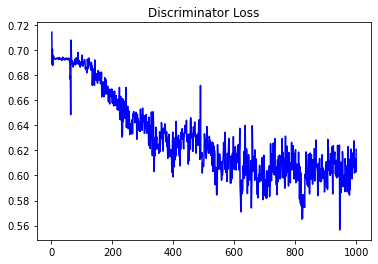

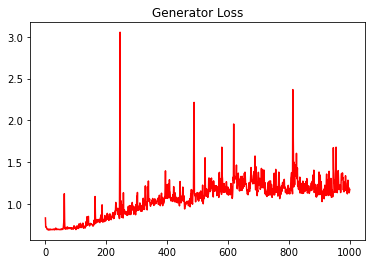

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.29438646208394464


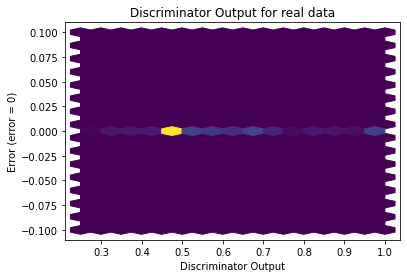

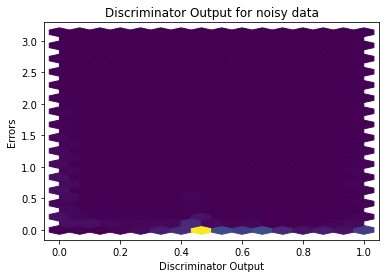

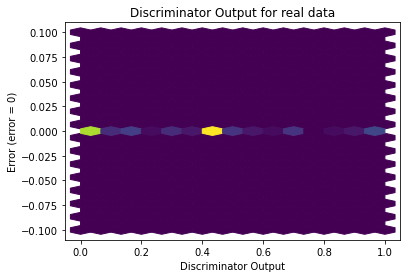

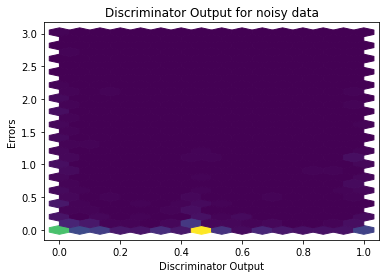

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

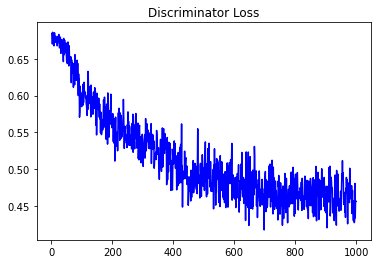

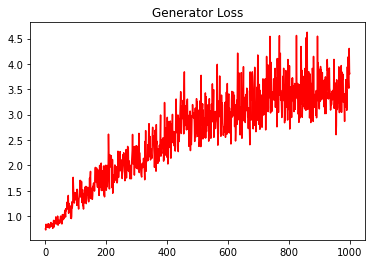

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2891144171332959


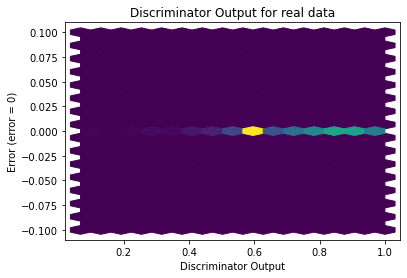

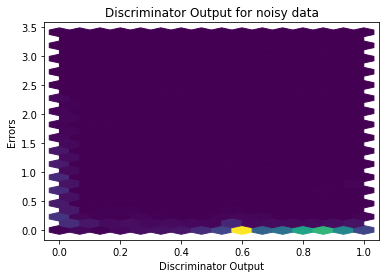

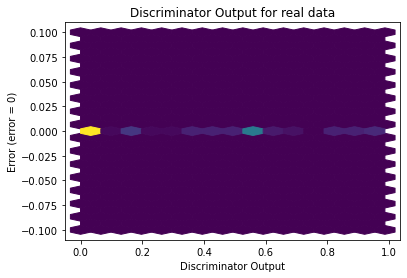

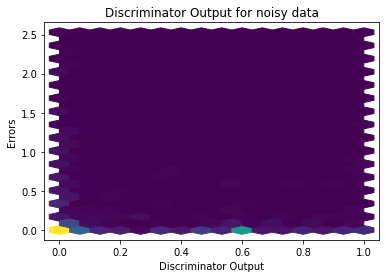

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


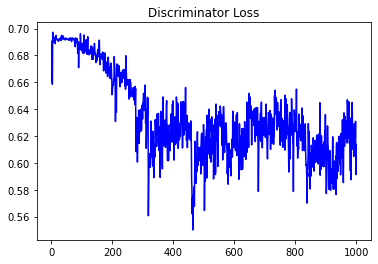

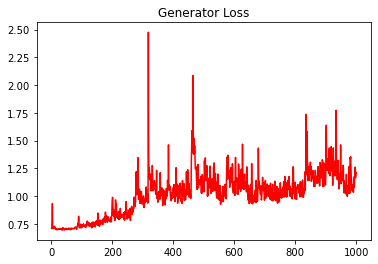

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.2719858278035113


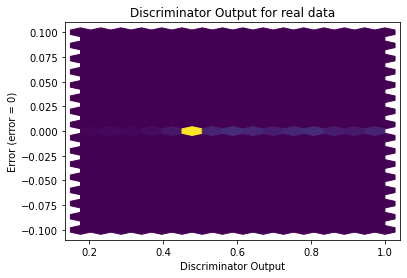

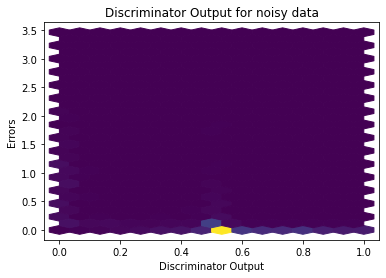

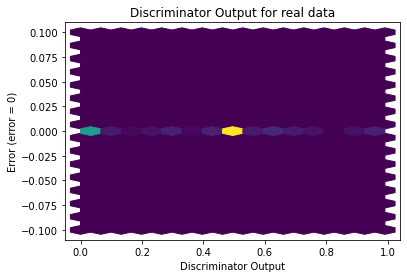

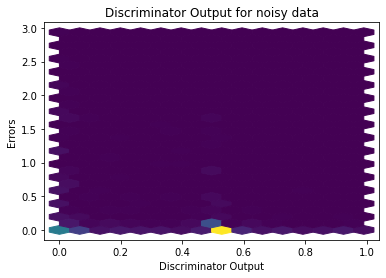

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


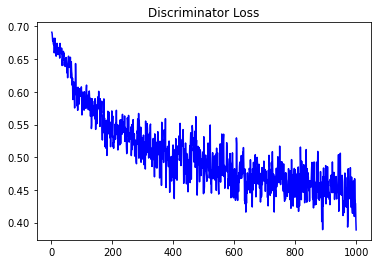

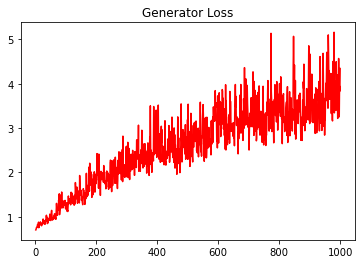

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.23857165382617193


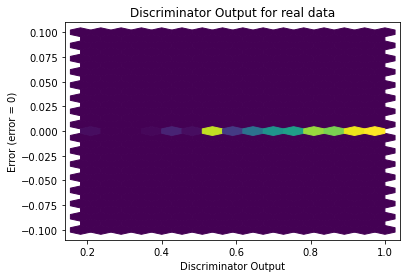

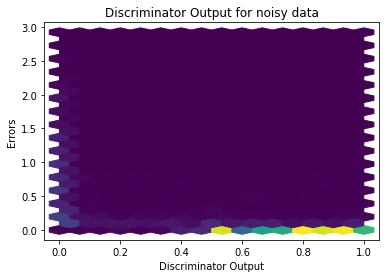

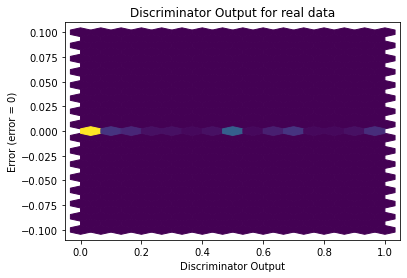

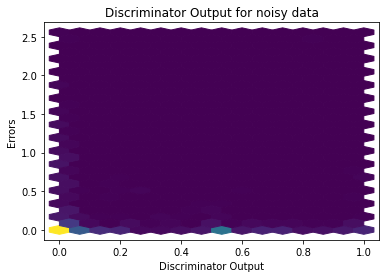

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9670]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9724]], requires_grad=True)
